## 2. Spectrum of Logistic Map

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### a)

In [0]:
def logistic_map(mu, u):
    return mu * u * (1 - u)

def logistic_seq(mu, u0=.1, n=10, windup=0):
    u = u0
    for i in range(windup):
        u = logistic_map(mu, u)
    out = []
    for i in range(n):
        u = logistic_map(mu, u)
        out.append(u)
    return(out)

#### i)

Generate $u_i$ for $\mu \in \{ 3.3, 3.5, 3.56, 3.57, 3.826, 3.83, 3.8494 \}$. We use a spinup phase, because we want a periodic sequence.

In [0]:
mus = [3.3, 3.5, 3.56, 3.57, 3.826, 3.83, 3.8494]
u0 = .1
windup = 1000
iters = 2**14

In [0]:
sequences = {}
for mu in mus:
    sequences[mu] = logistic_seq(mu, u0, iters, windup)

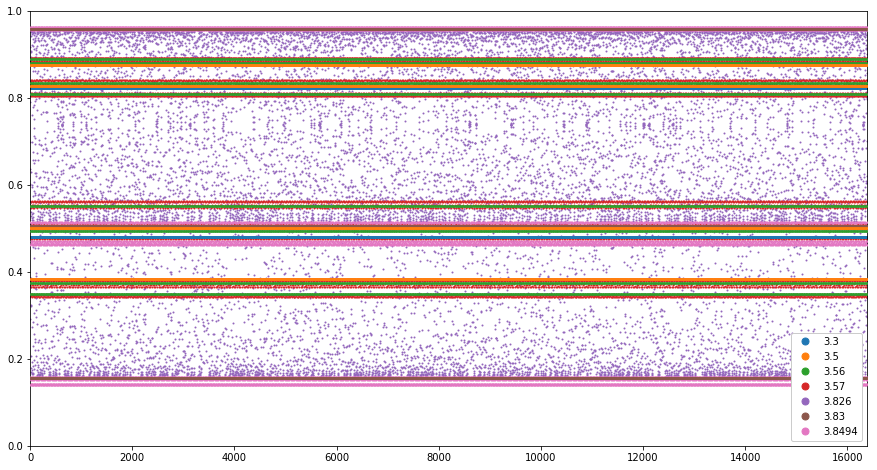

In [61]:
fig = plt.figure()
ax = plt.subplot()

mu_order = [3.826, 3.57, 3.3, 3.8494, 3.83, 3.56, 3.5]

for mu, seq in sequences.items():
    ax.plot(seq, linestyle='none', marker='.', markersize=2, label=mu, zorder=mu_order.index(mu))
ax.legend(markerscale=7, loc=4, framealpha=1)

ax.set_xlim(0, iters)
ax.set_ylim(0, 1)

fig.set_size_inches(15,8)
plt.show()

#### ii)

Calculate the spectra $| \mathcal{F} u |^2$.

In [0]:
spectra = {}
for mu, seq in sequences.items():
    spec = np.fft.rfft(seq)[1:-1]
    spectra[mu] = np.abs(spec)**2
    
freq = np.fft.rfftfreq(iters)[1:-1]

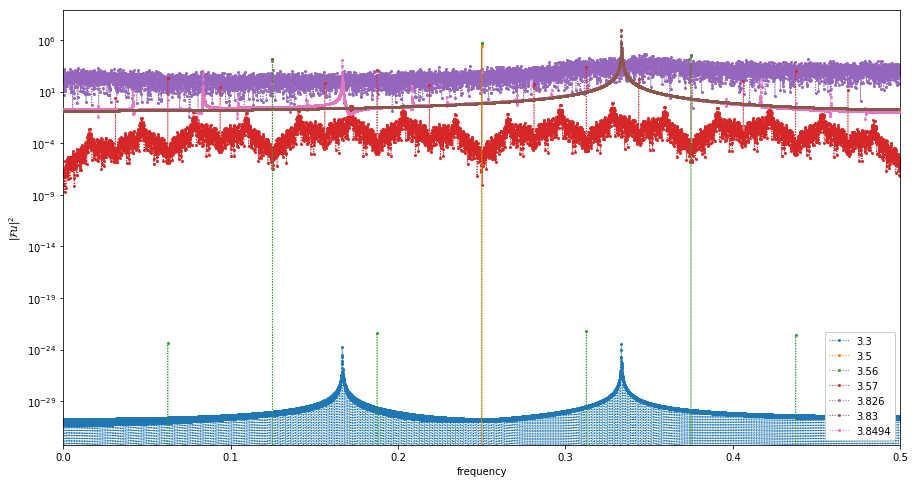

In [65]:
fig = plt.figure()
ax = plt.subplot()

mu_order = [3.826, 3.57, 3.3, 3.8494, 3.83, 3.56, 3.5]

for mu, spec in spectra.items():
    ax.plot(freq, spec, label=mu, linestyle='dotted', marker='.', markersize=4, linewidth=1, zorder=mu_order.index(mu))
ax.legend(loc=4, framealpha=1)
ax.set_xlabel('frequency')
ax.set_ylabel('$| \mathcal{F} u |^2$')

ax.set_yscale('log')
ax.set_xlim(0, freq[-1])

fig.set_size_inches(15,8)
plt.show()

Before we reach the chatoic regime, clear peaks are visible (blue, orange, green).

In the chaotic regime, all frequencies are present. Windows in the chaotic regime can be identified by the peaks within these spectra (brown, pink). The purple spectrum is completly chaotic and now sinlge frequency stands out from the others.

#### iii)

Compare for $\mu = 3.83$ the spectra from sequences with $N$ and $3 \times N$ points.

In [0]:
mus = 3.83
u0 = .1
windup = 1000
iters = 3 * 2**14

In [0]:
seq = logistic_seq(mu, u0, iters, windup)
spec = np.abs(np.fft.rfft(seq))[1:-1]**2
new_freq = np.fft.rfftfreq(iters)[1:-1]

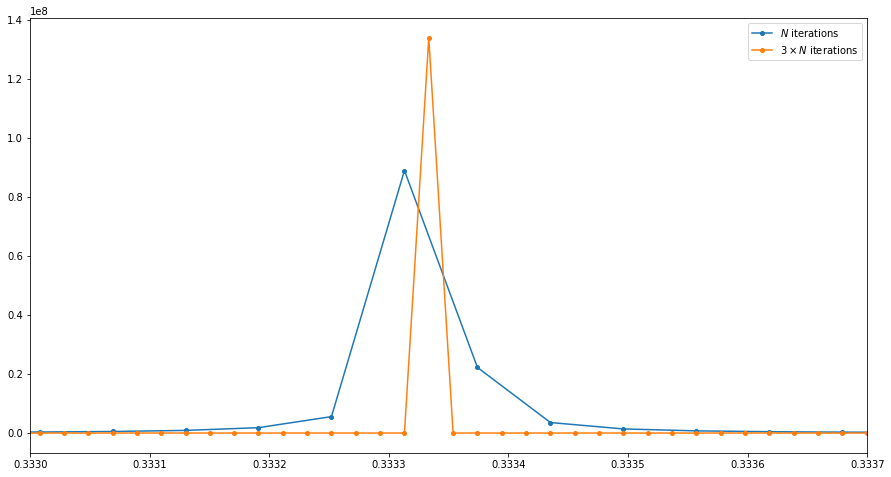

In [45]:
fig = plt.figure()
ax = plt.subplot()

ax.plot(freq, spectra[3.83]*9, marker='.', markersize=8, label=r'$N$ iterations')
ax.plot(new_freq, spec, marker='.', markersize=8, label=r'$3 \times N$ iterations')

ax.legend()
ax.set_xlabel('frequency')
ax.set_ylabel('$| \mathcal{F} u |^2$')

ax.set_xlim(.333, .3337)

fig.set_size_inches(15,8)
plt.show()

With more iterations, the peak in the spectrum is much sharper. This is the case because over time the sequence aproaches the attractor closer. Therefore the non-perodicity get's smaller.

### b)

We look at $\mu = 3$. This at a birfucation point of the logistic map, therfore the sequence approaches the attractor very slowly. The generated squence $u$ is therefor non-periodic for many iterations.

In [0]:
mu = 3.
u0 = .1
windup = 1
iters = 2**17

In [0]:
seq = logistic_seq(mu, u0, iters, windup)
spec = np.abs(np.fft.rfft(seq))[1:-1]**2
freq = np.fft.rfftfreq(iters)[1:-1]

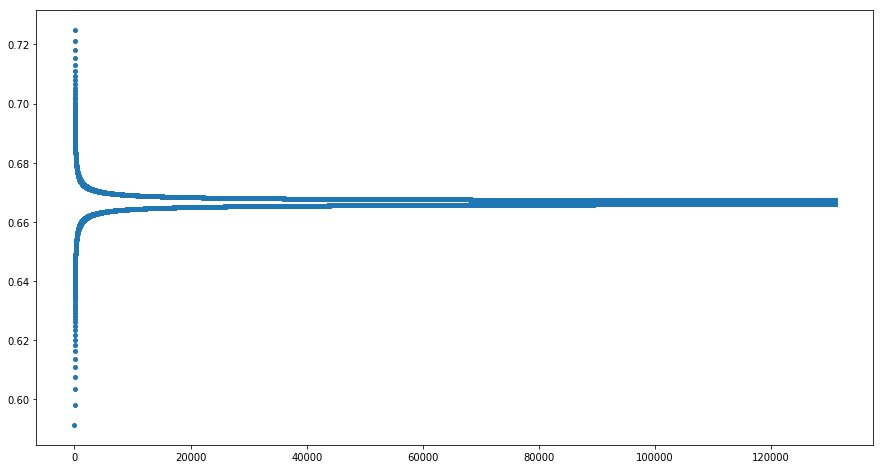

In [69]:
fig = plt.figure()
ax = plt.subplot()

ax.plot(seq, linestyle='none', marker='.', markersize=8)

fig.set_size_inches(15,8)
plt.show()

We see, that the sequence approaches the fixpoint very slowly.

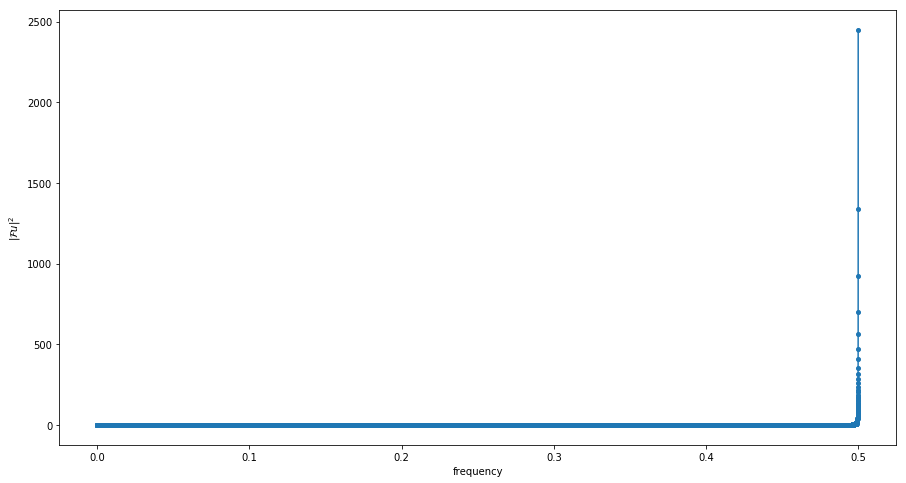

In [70]:
fig = plt.figure()
ax = plt.subplot()

ax.plot(freq, spec, marker='.', markersize=8)
ax.set_xlabel('frequency')
ax.set_ylabel('$| \mathcal{F} u |^2$')

fig.set_size_inches(15,8)
plt.show()

Because the signal is non-peroidic, the Fourier transformation explodes for the lagest frequencies.